In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
# Aggregate Rock Data (for rock category labels)
df = pd.read_csv('./data/joined_HPMD.csv')
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,...,Confidence In National Government,index,Code,Schizophrenia,Bipolar disorders,Eating disorders,Anxiety disorders,Drug use disorders,Depression,Alcohol use disorders
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,...,0.612072,18,AFG,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,...,0.611545,19,AFG,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,...,0.299357,20,AFG,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,...,0.307386,21,AFG,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,...,0.435440,22,AFG,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372


In [4]:
df.isnull().sum()

Country Name                         0
Regional Indicator                   0
Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
index                                0
Code                                 0
Schizophrenia                        0
Bipolar disorders                    0
Eating disorders                     0
Anxiety disorders                    0
Drug use disorders                   0
Depression                           0
Alcohol use disorders                0
dtype: int64

In [5]:
df.shape

(1221, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       1221 non-null   object 
 1   Regional Indicator                 1221 non-null   object 
 2   Year                               1221 non-null   int64  
 3   Life Ladder                        1221 non-null   float64
 4   Log GDP Per Capita                 1221 non-null   float64
 5   Social Support                     1221 non-null   float64
 6   Healthy Life Expectancy At Birth   1221 non-null   float64
 7   Freedom To Make Life Choices       1221 non-null   float64
 8   Generosity                         1221 non-null   float64
 9   Perceptions Of Corruption          1221 non-null   float64
 10  Positive Affect                    1221 non-null   float64
 11  Negative Affect                    1221 non-null   float

In [7]:
columns_to_drop = ['Regional Indicator', 'index','Code']  # Replace with your actual column names

# Remove the specified columns
df = df.drop(columns=columns_to_drop)

In [8]:
columns_to_drop = ['Country Name']  # Replace with your actual column names

# Remove the specified columns
df = df.drop(columns=columns_to_drop)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               1221 non-null   int64  
 1   Life Ladder                        1221 non-null   float64
 2   Log GDP Per Capita                 1221 non-null   float64
 3   Social Support                     1221 non-null   float64
 4   Healthy Life Expectancy At Birth   1221 non-null   float64
 5   Freedom To Make Life Choices       1221 non-null   float64
 6   Generosity                         1221 non-null   float64
 7   Perceptions Of Corruption          1221 non-null   float64
 8   Positive Affect                    1221 non-null   float64
 9   Negative Affect                    1221 non-null   float64
 10  Confidence In National Government  1221 non-null   float64
 11  Schizophrenia                      1221 non-null   float

In [10]:
stats = df.describe()
print(stats)

              Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  1221.000000  1221.000000         1221.000000     1221.000000   
mean   2011.969697     5.445420            9.309044        0.812593   
std       3.381953     1.158965            1.159940        0.121738   
min    2005.000000     2.661718            5.943209        0.290934   
25%    2009.000000     4.568619            8.334213        0.747681   
50%    2012.000000     5.332178            9.455110        0.838044   
75%    2015.000000     6.320119           10.249216        0.908713   
max    2017.000000     7.970892           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       1221.000000                   1221.000000   
mean                          62.650528                      0.733676   
std                            7.454664                      0.142597   
min                            6.720000                      0.26006

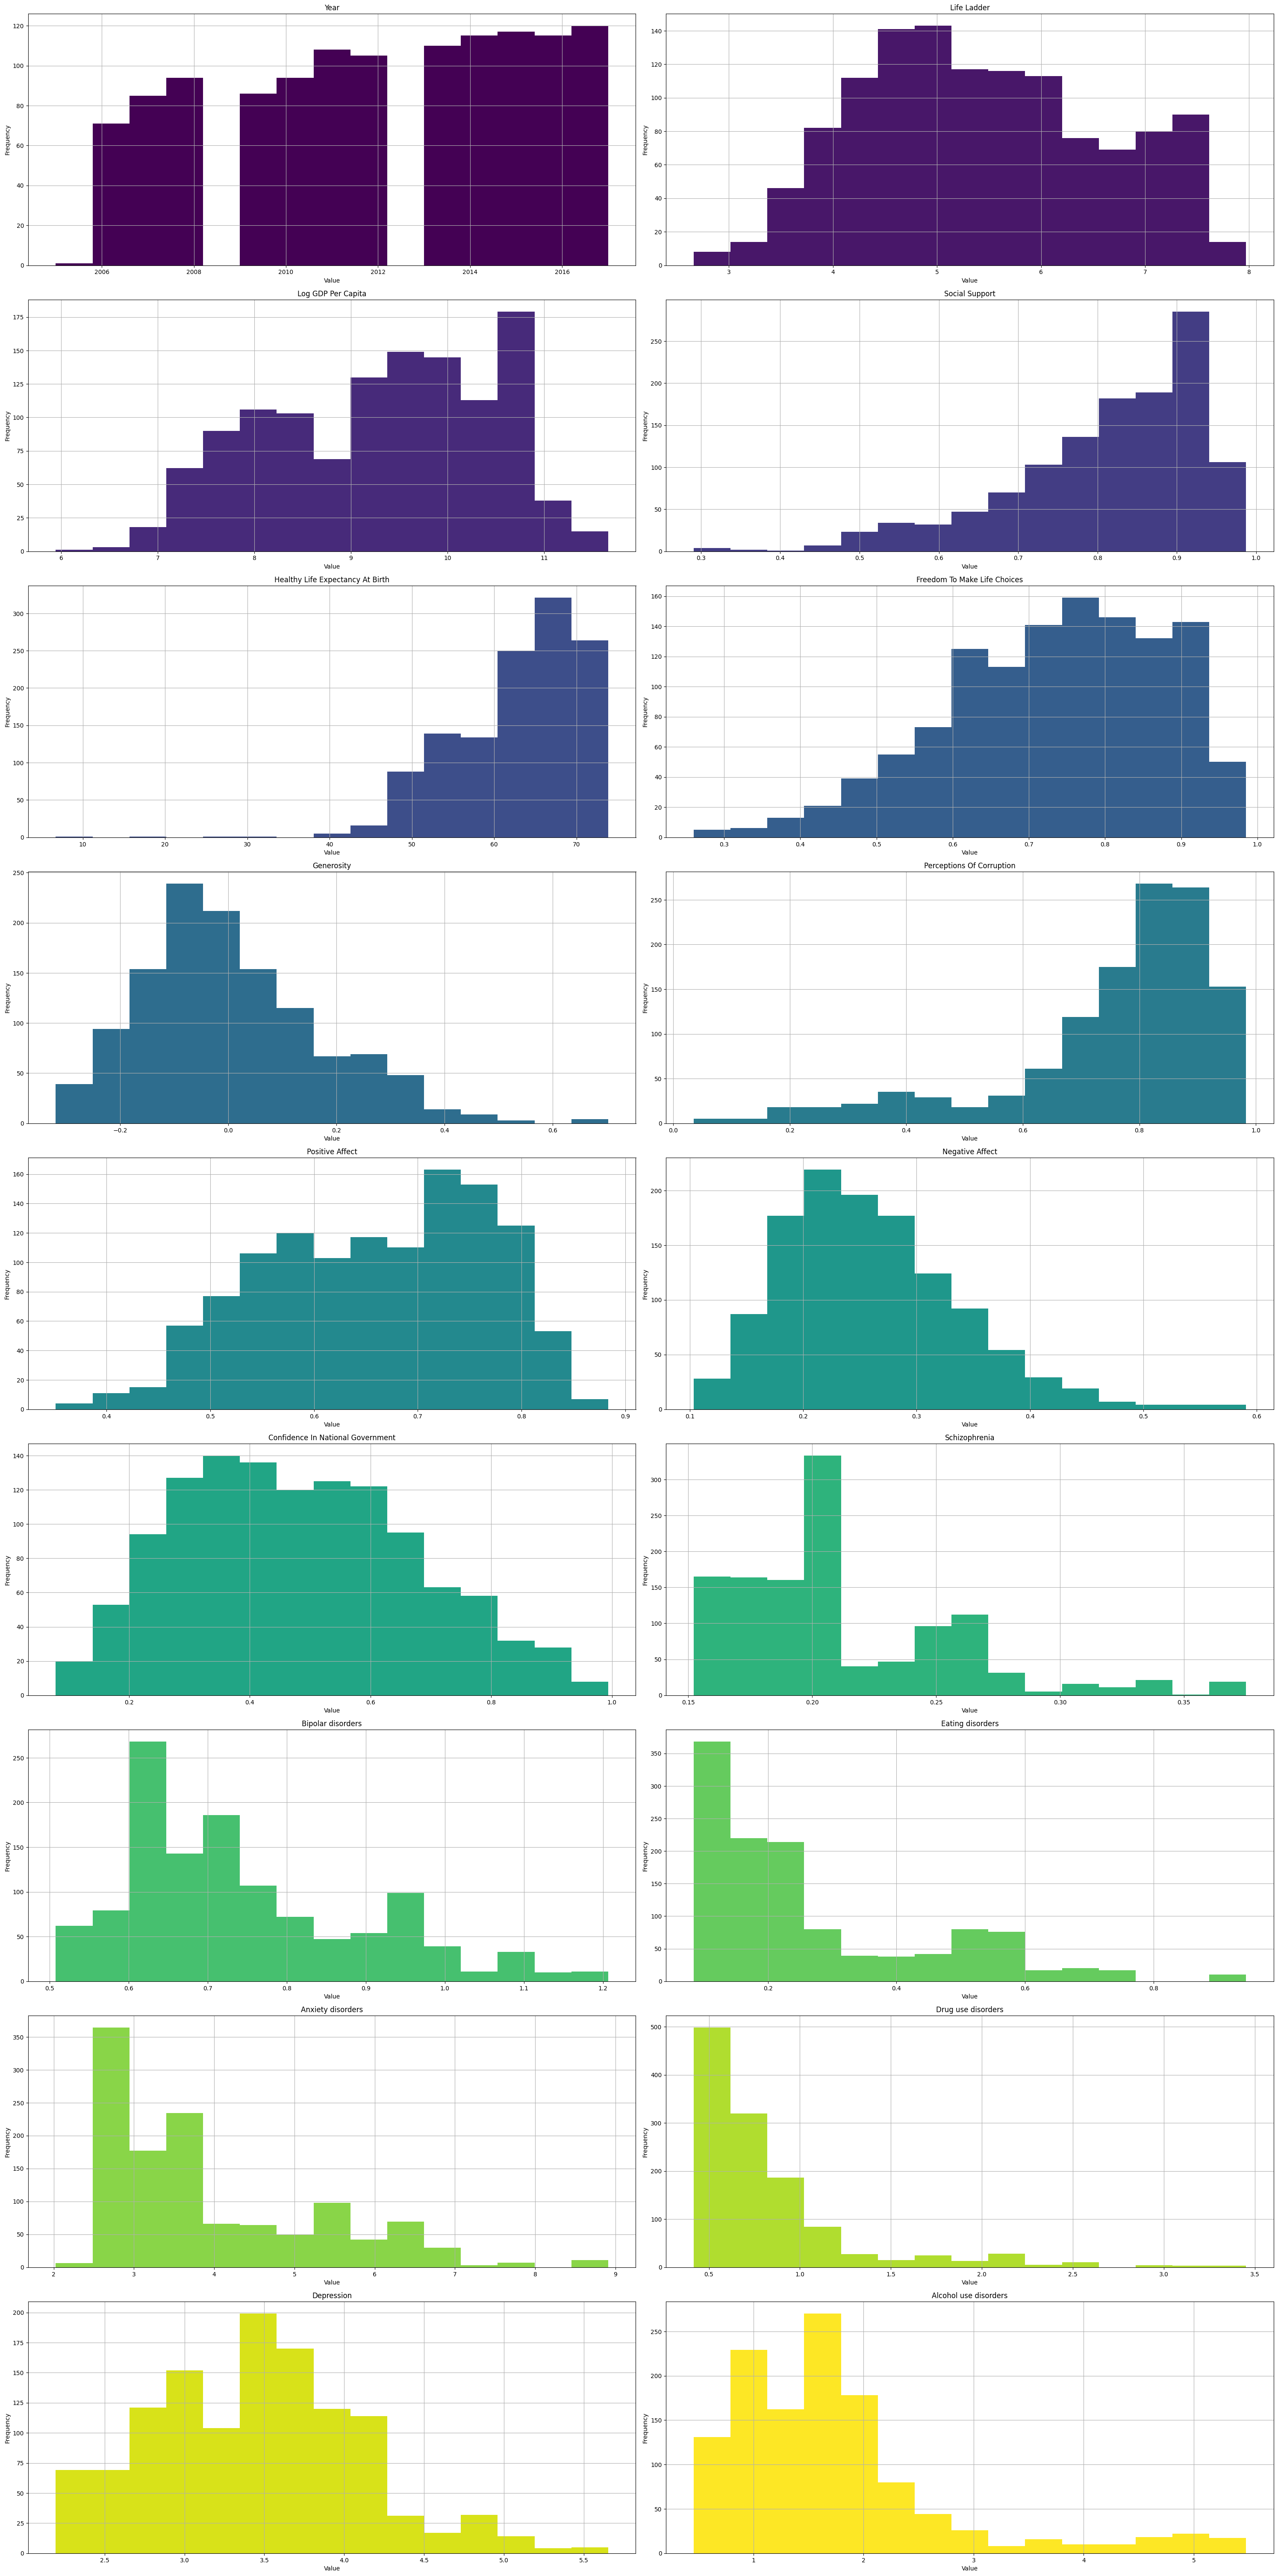

In [11]:
num_features = len(df.columns)
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(30, 80))
axes = axes.flatten()

# Define colors for each plot
colors = plt.cm.viridis(np.linspace(0, 1, num_features))

# Plot each histogram with a unique color
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=15, color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# 2. Pearson Correlation Coefficient (PCC) and scatter plots
correlation_matrix = df.corr()  # Correlation between the attributes
print(correlation_matrix)


                                       Year  Life Ladder  Log GDP Per Capita  \
Year                               1.000000     0.026683            0.081323   
Life Ladder                        0.026683     1.000000            0.796120   
Log GDP Per Capita                 0.081323     0.796120            1.000000   
Social Support                    -0.007545     0.698902            0.683087   
Healthy Life Expectancy At Birth   0.143689     0.730254            0.830584   
Freedom To Make Life Choices       0.170082     0.533275            0.377512   
Generosity                         0.001623     0.255187            0.049149   
Perceptions Of Corruption         -0.085701    -0.494005           -0.388593   
Positive Affect                    0.017447     0.523493            0.255515   
Negative Affect                    0.194581    -0.248475           -0.178586   
Confidence In National Government -0.002011    -0.074944           -0.191399   
Schizophrenia                      0.036

In [13]:
correlation_matrix.shape

(18, 18)

In [14]:
columns_to_drop = ['Perceptions Of Corruption', 'Negative Affect','Confidence In National Government','Generosity', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect', 'Year']  # Replace with your actual column names

# Remove the specified columns
df = df.drop(columns=columns_to_drop)

In [15]:
# 2. Pearson Correlation Coefficient (PCC) and scatter plots
correlation_matrix = df.corr()  # Correlation between the attributes
print(correlation_matrix)

                       Life Ladder  Log GDP Per Capita  Schizophrenia  \
Life Ladder               1.000000            0.796120       0.699681   
Log GDP Per Capita        0.796120            1.000000       0.715519   
Schizophrenia             0.699681            0.715519       1.000000   
Bipolar disorders         0.641812            0.594125       0.486699   
Eating disorders          0.769497            0.796493       0.775833   
Anxiety disorders         0.498016            0.507933       0.573735   
Drug use disorders        0.379334            0.416711       0.479515   
Depression                0.099947            0.103551       0.255821   
Alcohol use disorders     0.113074            0.197908      -0.098836   

                       Bipolar disorders  Eating disorders  Anxiety disorders  \
Life Ladder                     0.641812          0.769497           0.498016   
Log GDP Per Capita              0.594125          0.796493           0.507933   
Schizophrenia             

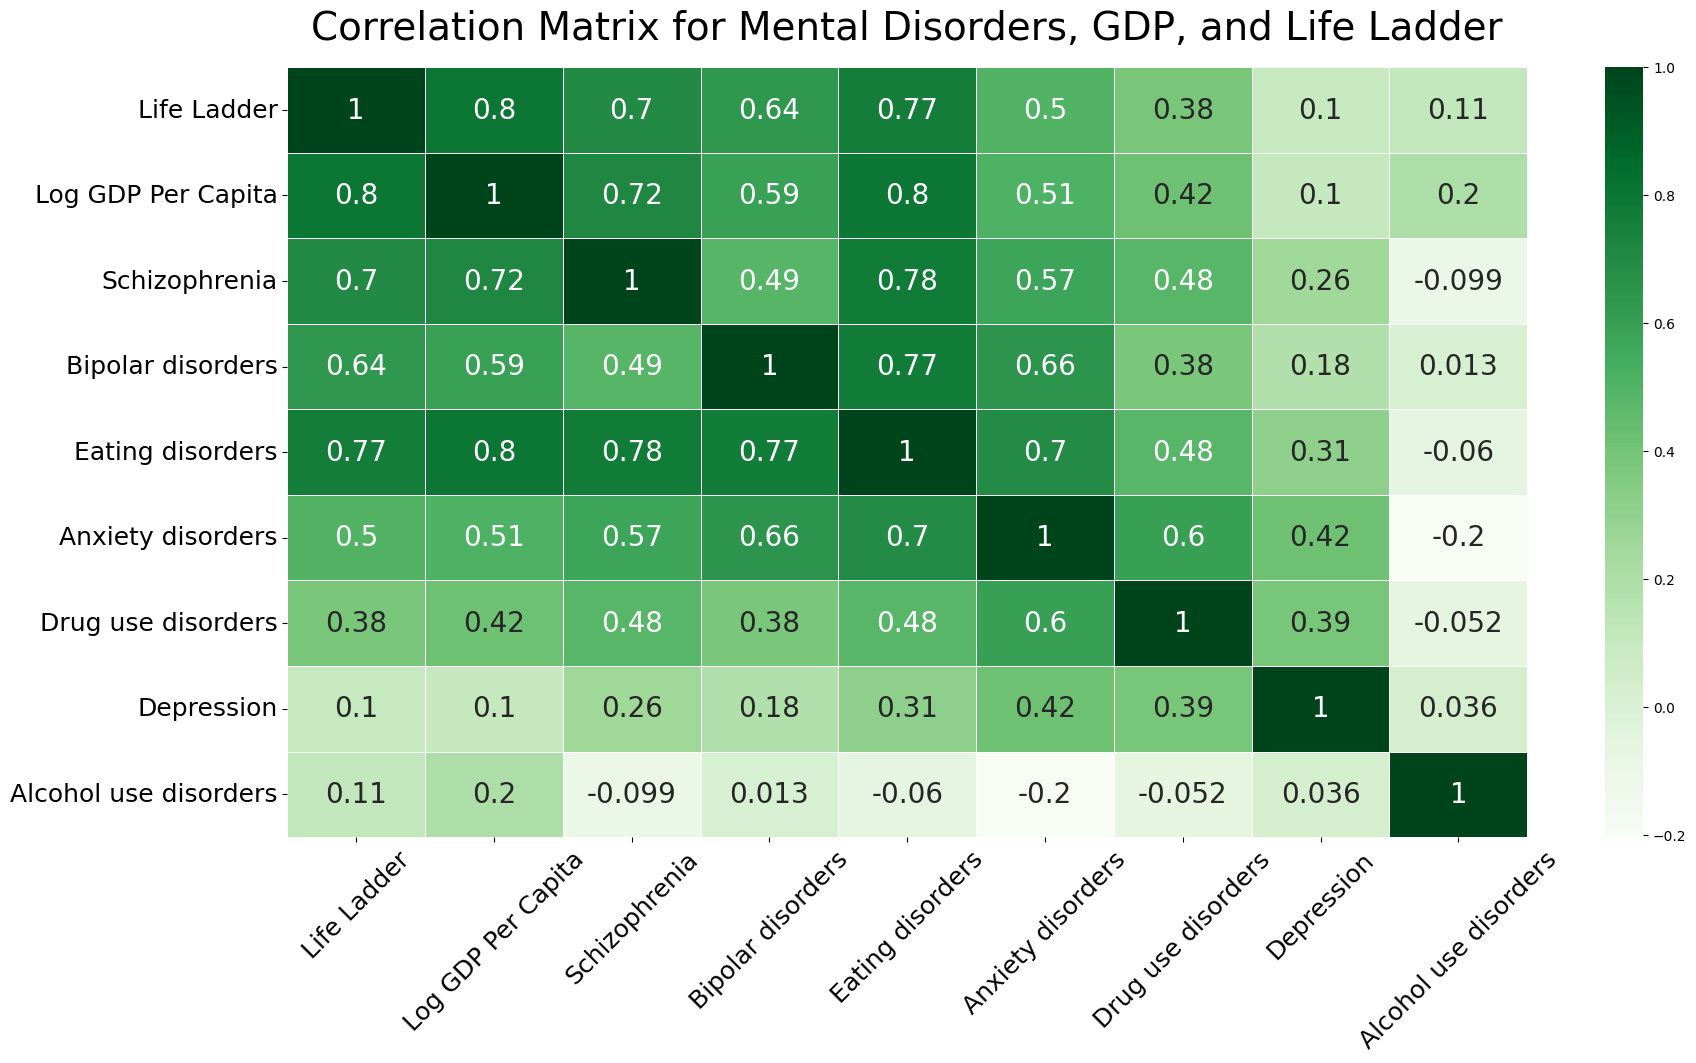

: 

In [ ]:
# Visualizing correlations using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5, annot_kws={'size': 20})
plt.title('Correlation Matrix for Mental Disorders, GDP, and Life Ladder', fontsize=28, pad = 20)  # Adjust title font size
plt.xticks(rotation=45, fontsize=18)  # Adjust x-tick font size
plt.yticks(fontsize=18)  # Adjust y-tick font size
plt.show()